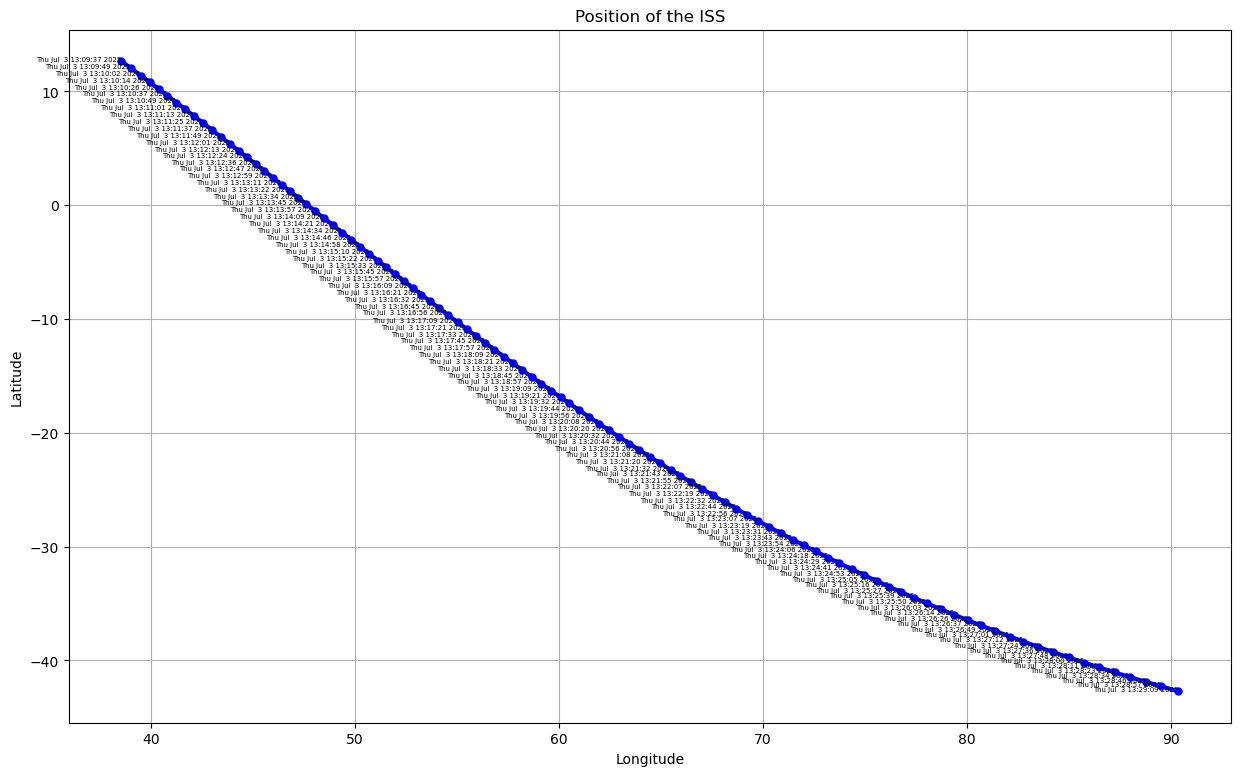

In [12]:
import requests as rq
import matplotlib.pyplot as mp
import time as tm # for spacing out the requests

long_lst = []
lat_lst = []
time_lst = []

for i in range(100):
    api_iss = rq.get('https://api.wheretheiss.at/v1/satellites/25544') # open the url
    
    data = api_iss.json() # use the data as a json table
    
    # gather coordinates
    timestamp = data['timestamp']
    longitude = data['longitude']
    latitude = data['latitude']

    # append to the corresponding lists
    time_lst.append(timestamp)
    long_lst.append(longitude)
    lat_lst.append(latitude)

    # tell the program to wait 10 seconds before gathering more data
    tm.sleep(10)

# creating the graph
mp.figure(figsize=(15,9))
mp.plot(long_lst, lat_lst, marker = 'o', color='blue', linewidth='3', linestyle='-', markersize =5)
mp.xlabel('Longitude')
mp.ylabel('Latitude')
mp.title('Position of the ISS')
mp.grid(True)

# add labels to each data point
for yax, xax, t in zip(long_lst, lat_lst, time_lst):
    mp.text(yax, xax, tm.ctime(t), fontsize = 5, ha = 'right', color = 'black')

mp.show()